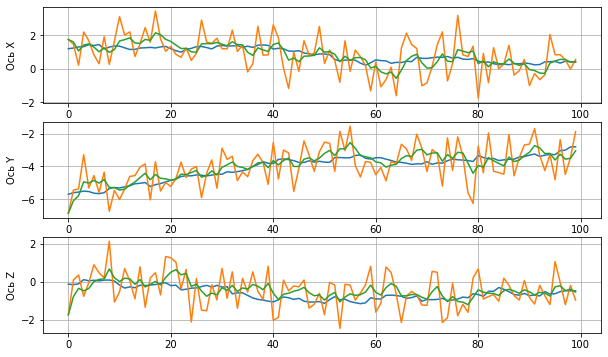

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100         # число наблюдений
dNoise = 1      # дисперсия шума
dSignal = 5     # дисперсия сигнала
r = 0.99        # коэффициент корреляции в модели движения
en = 0.1        # дисперсия СВ в модели движения

M = 3           # размерность вектора координат положения объекта
R = np.array([[r, 0, 0], [0, r, 0], [0, 0, r]])
Vksi = np.eye(M)*en     # диагональная матрица с дисперсиями en по главной диагонали
V = np.eye(M)*dNoise    # диагональная матрица с дисперсиями ошибок наблюдений

x = np.zeros(N*M).reshape(N, M)               # истинные координаты перемещения (пока просто нули)
x[:][0] = np.random.normal(0, dSignal, M)     # формирование первой координаты
for i in range(1, N):                   # формирование последующих координат по модели АР
    x[:][i] = np.dot(R, x[:][i-1]) + np.random.normal(0, en, M)

z = x + np.random.normal(0, dNoise, size=(N, M))  # формирование наблюдений


# фильтрация сигнала с помощью фильтра Калмана
xx = np.zeros(N*M).reshape(N, M)    # вектор для хранения оценок перемещений
P = np.zeros(M*M).reshape(M, M)     # вектор для хранения дисперсий ошибок оценивания
xx[:][0] = z[:][0]        # первая оценка
P = V                   # дисперсия первой оценки

Vinv = np.linalg.inv(V) # вычисление обратной матрицы дисперсий ошибок наблюдений

# рекуррентное вычисление оценок по фильтру Калмана
for i in range(1, N):
    Pe = np.dot(np.dot(R, P), R.T) + Vksi
    P = np.dot(Pe, V)*np.linalg.inv(Pe+V)
    xe = np.dot(R, xx[:][i-1])
    xx[:][i] = xe+np.dot(np.dot(P, Vinv), (z[:][i]-xe))

# отображение результатов
fig, (axX, axY, axZ) = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

res = xx.reshape(M*N)
resX = x.reshape(M*N)
resZ = z.reshape(M*N)

axX.plot(resX[0:N*M:M]); axX.plot(resZ[0:N*M:M]); axX.plot(res[0:N*M:M])
axY.plot(resX[1:N*M:M]); axY.plot(resZ[1:N*M:M]); axY.plot(res[1:N*M:M])
axZ.plot(resX[2:N*M:M]); axZ.plot(resZ[2:N*M:M]); axZ.plot(res[2:N*M:M])

axX.set_ylabel('Ось X')
axY.set_ylabel('Ось Y')
axZ.set_ylabel('Ось Z')

axX.grid(True)
axY.grid(True)
axZ.grid(True)

plt.show()